## **Author**: **Peter** **Samy**
## Track : Data Science and Business Analytics
##Task 1

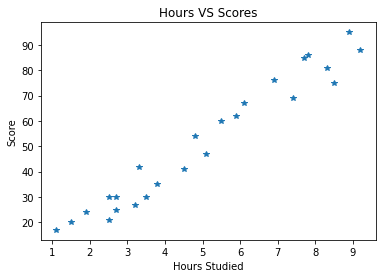

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


URL = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(URL)
df.head()

plt.plot(df["Hours"], df["Scores"], '*')
plt.title("Hours VS Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()


In [ ]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Preparing the data
dataLength = len(df)
dataLength
x = df.iloc[0:dataLength, 0:-1]
y = df.iloc[0:dataLength, -1:]

In [ ]:
#Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Applying the linear regression
from sklearn.linear_model import LinearRegression  
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

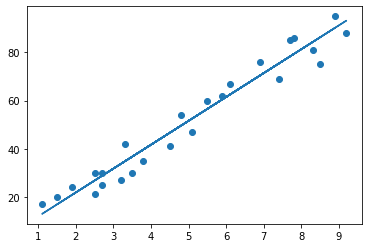

In [ ]:
#Plotting the model
#First: Calculate the line = aX + y
line = (model.coef_*x) + model.intercept_
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [ ]:
#Prediction using test data
y_pred = model.predict(x_test)

#data = {'Actual': [y_test], 'Predicted': [y_pred]}

test_df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
test_df

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[16.884144762398023], [33.732260779489835], [..."


In [ ]:
#Predict the given data (Hours = 9.25)
import numpy as np

newRecord = np.array([9.25])
b = np.reshape(newRecord, (1, -1))
my_pred = model.predict(b)
print("No of Hours = {}".format(newRecord))
print("Predicted Score = {}".format(my_pred))

No of Hours = [9.25]
Predicted Score = [[93.69173249]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Evaluate my model
from sklearn import metrics
error = metrics.mean_absolute_error(y_test, y_pred)

print("Mean absolute error: ", error)

Mean absolute error:  4.183859899002982
